<a href="https://colab.research.google.com/github/rashmi-biswas/Netflix_movies_tvshows_clustering/blob/main/NETFLIX_MOVIES_%26_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies and TV Shows Clustering**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

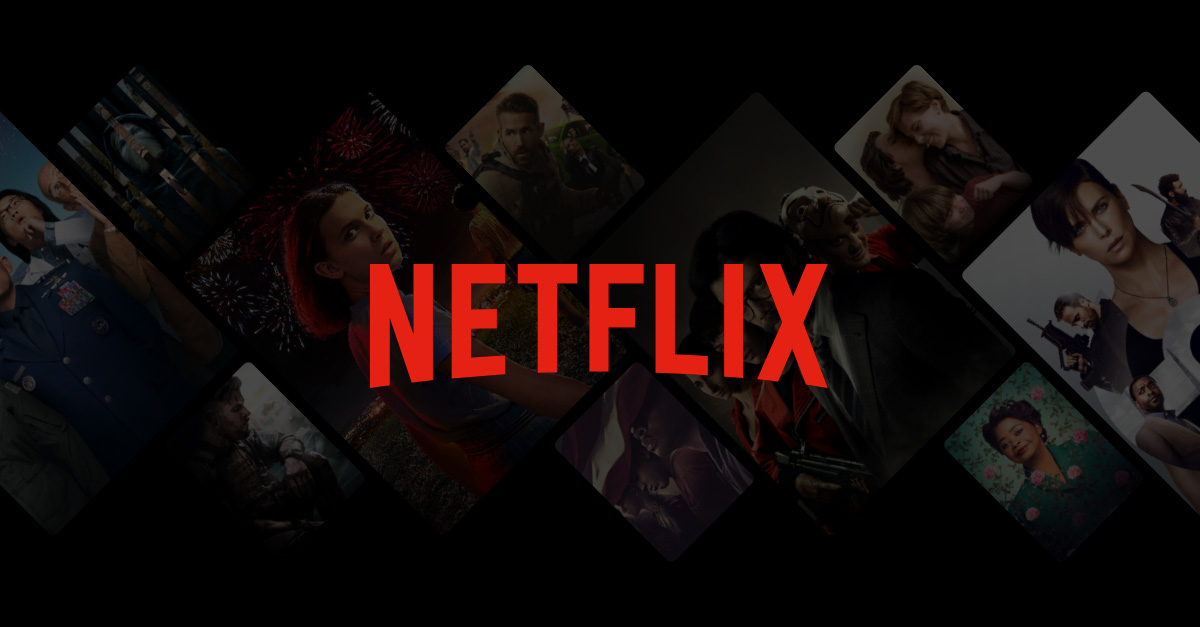

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [317]:
#importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

In [318]:
#mounting google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
#loading dataset
netflix = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/CS Project 4: ML Clustering/Dataset.csv')

### **Understanding Data**

In [320]:
#top 5 rows
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [321]:
#shape of the dataset
netflix.shape

(7787, 12)

In [322]:
#information about the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [323]:
#column names
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [324]:
#Drop Duplicates
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


**There are no duplicate values**

In [325]:
#checking null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [326]:
#all null values
netflix.isnull().sum().sum()

3631

There are total **3631 null values** in the dataset, out of which 2389 are in the director column, 718 are in the cast column and 507 in the country column.
We need to handle the null values of the above 3 columns.
date_added and rating also have **10 and 7 null values** respectively, which comprises of an insignificant portion of the data. 
So we will drop them.

In [327]:
#drop rows having date_added and rating as null
netflix.dropna(subset=['date_added','rating'],inplace=True)

In [328]:
#handling null values
netflix['cast'].fillna(value='No cast', inplace=True)
netflix['country'].fillna(value=netflix['country'].mode()[0],inplace=True)

In [329]:
#droping director column
netflix.drop(['director'],axis=1,inplace=True)

In [330]:
netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [331]:
#convert date time format
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix['year_added']=netflix['date_added'].dt.year
netflix['month_added']=netflix['date_added'].dt.month
netflix['day_added']=netflix['date_added'].dt.day

In [332]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   int64         
 12  month_added   7770 non-null   int64         
 13  day_added     7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 910.5+ KB


In [333]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['target_ages'] = netflix['rating'].replace(ratings)

In [334]:
# type should be a category
netflix['type'] = pd.Categorical(netflix['type'])

# target_ages is another category (4 classes)
netflix['target_ages'] = pd.Categorical(netflix['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [335]:
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teens


##**Exploratory Data Analysis (EDA)**

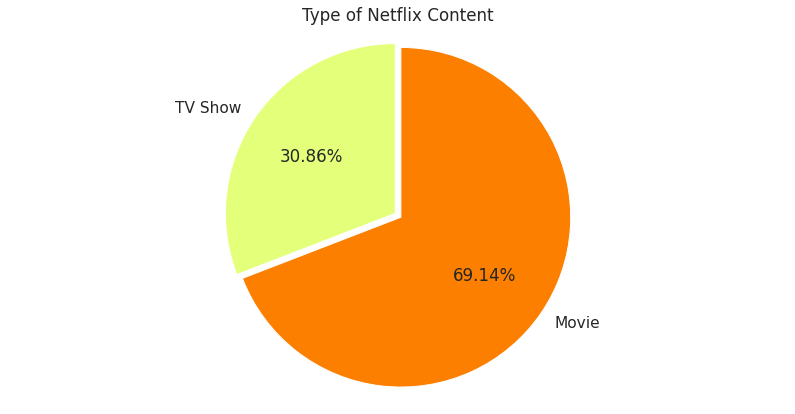

In [336]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
plt.pie(netflix['type'].value_counts().sort_values(),labels=labels,colors= colors, explode=[0.02,0.02],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Rating')

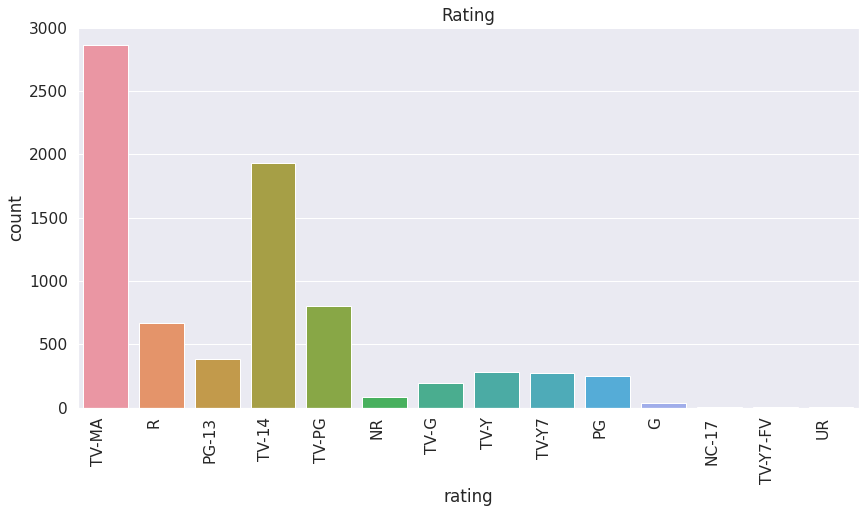

In [337]:
#Ratings on Netflix
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.title('Rating')

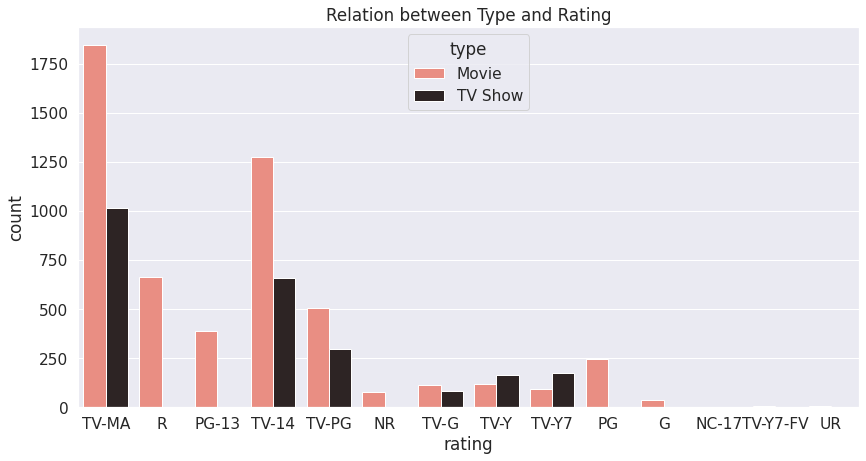

In [338]:
#Type vs Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=netflix, palette='dark:salmon_r')
plt.title('Relation between Type and Rating')
plt.show()

In [339]:
#Production Growth based on type of Content and release year
yearly_movies=netflix[netflix.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=netflix[netflix.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=netflix['release_year'].value_counts().sort_index(ascending=False).head(15)

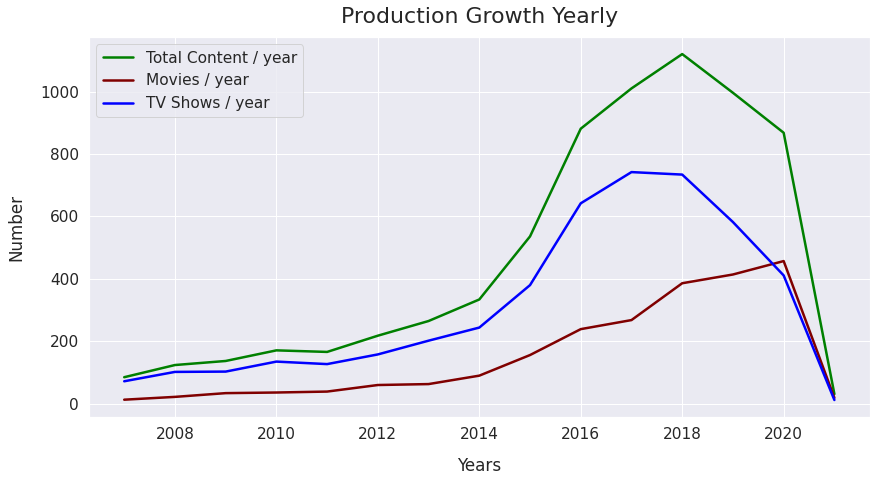

In [340]:
#Yearwise growth in production
sns.set(font_scale=1.4)
total_content.plot(figsize=(14, 7), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(14, 7), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(14, 7), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

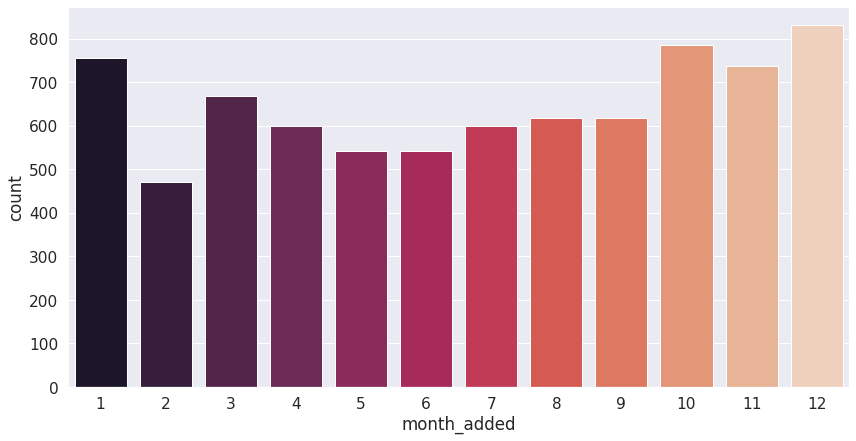

In [341]:
# Release of movies month wise
plt.figure(figsize=(14,7))
ax=sns.countplot('month_added',data= netflix , palette='rocket')

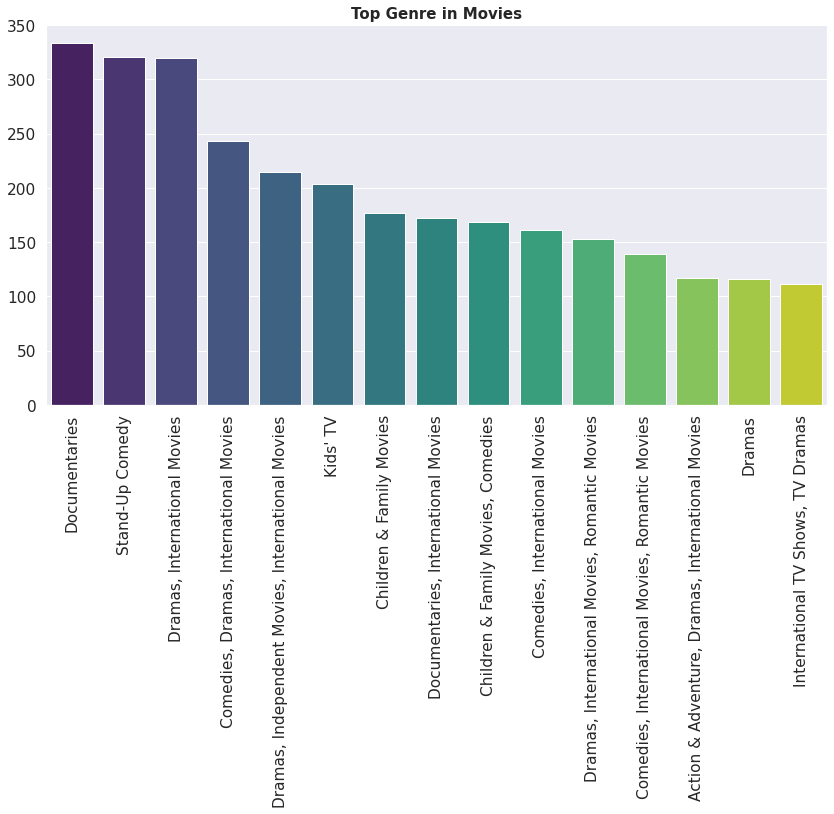

In [342]:
#Top 10 Genre in movies
plt.figure(figsize=(14,7))
sns.barplot(x = netflix["listed_in"].value_counts().head(15).index,
            y = netflix["listed_in"].value_counts().head(15).values,palette="viridis")
plt.xticks(rotation=90)
plt.title("Top Genre in Movies",size='15',fontweight="bold")
plt.show()

In [343]:
#convert string to integer
netflix['duration']=netflix['duration'].str.replace('Season','')
netflix['duration']=netflix['duration'].str.replace('s','')
netflix['duration']=netflix['duration'].str.replace('min','')

netflix['duration']=netflix['duration'].astype(str).astype(int)
netflix['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

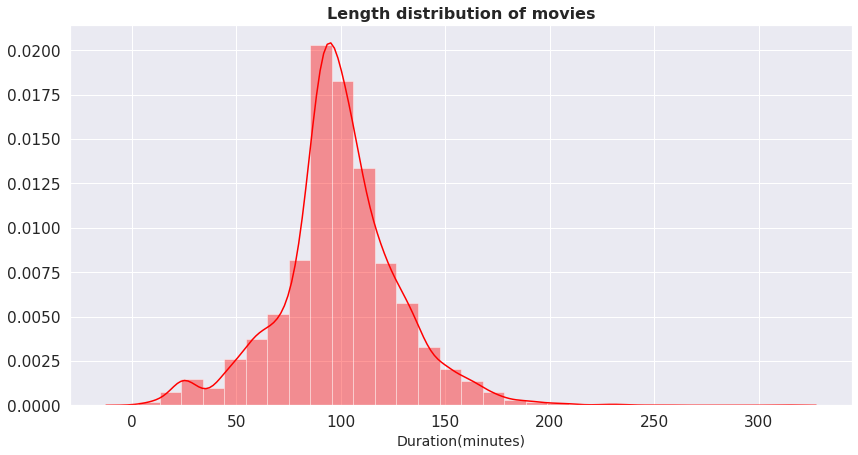

In [344]:
# Length distribution of movies
movie_df = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Red').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration(minutes)', fontsize=14)
plt.show()

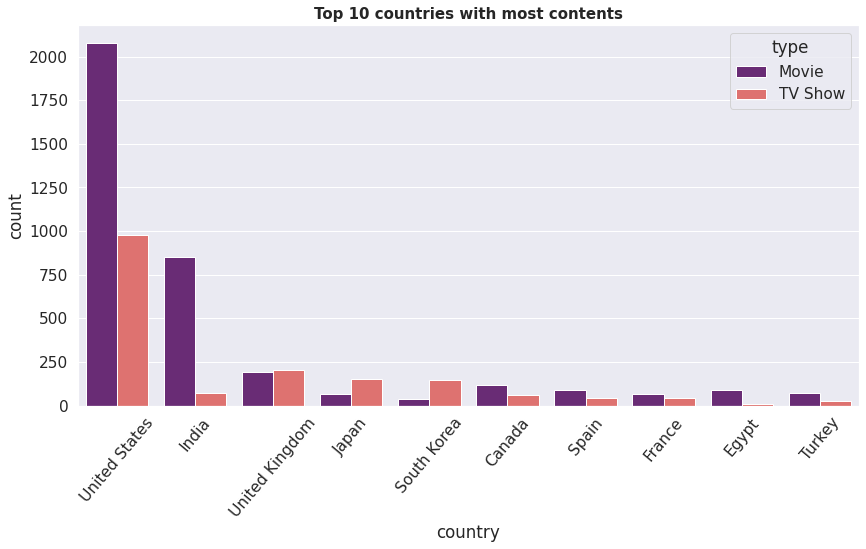

In [345]:
#Analysing top10 countries with most content 
plt.figure(figsize=(14,7))
sns.countplot(x=netflix['country'],palette="magma",order=netflix['country'].value_counts().index[0:10],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

<BarContainer object of 11 artists>

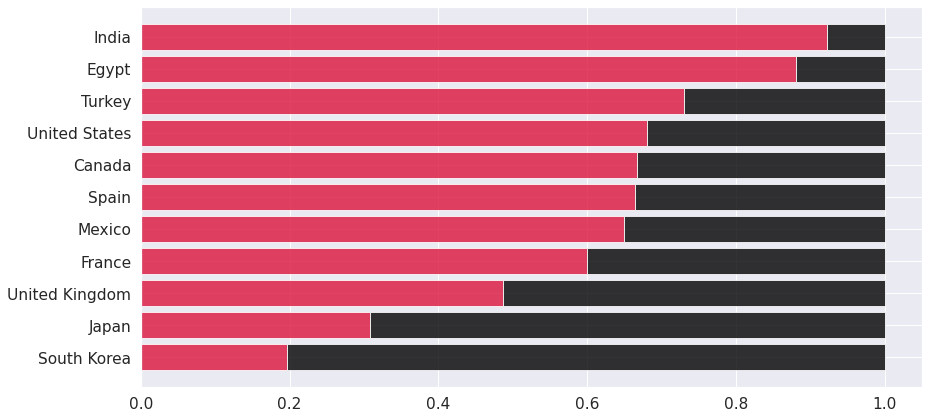

In [346]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix['country'].value_counts()[:11].index
content_data = netflix[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(14, 7),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

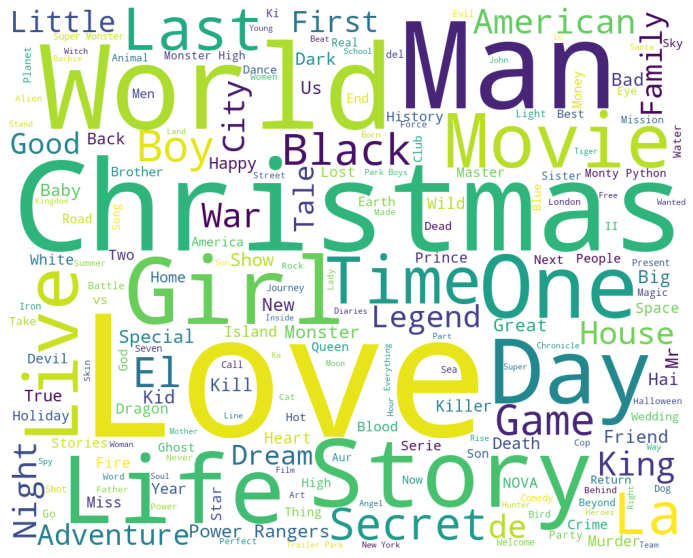

In [347]:
#Most occurred word in title
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1000,
                          height=800
                         ).generate(" ".join(netflix.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [348]:
# Preparing data for heatmap
netflix['count'] = 1
data = netflix.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


heatmap = netflix.loc[netflix['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


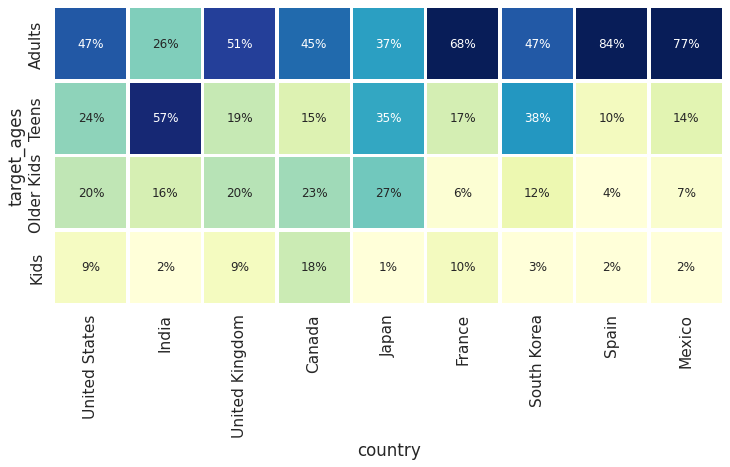

In [349]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

## **EDA Findings**

1.  Most of the type of content on Netflix is Movies which is 69.14%, whereas TV shows consist of 30.86% of the content.
2. The most frequent visitors of Netflix are Adults and Teens.
3. Production growth increased gradually after 2014 and experienced a downfall again in 2020. Covid epidemic can be a major reason behind the downfall in production.
4. Most of the content added on Netflix is in the month of October, November, December, and January. Maybe the festival season followed by the vacation season of Christmas and New Year can be the possible reason behind this.
5. The top genre of movies on Netflix is Documentaries, Stand up Comedy, Dramas, and International Movies.
6. The average length of movies on Netflix is about 100 minutes.
7. Most of the content on Netflix is added by the United States, followed by India and United Kingdom.
8. Most frequently occurring words in the title of Netflix Movies are Love, Christmas, Life, World, Man, Story, Girl, Day, One, Game, and Secret.
9. In all other countries, the maximum population using Netflix is Adults. But in India, the maximum population is teenagers.

## **No. of Category**

In [350]:
netflix.listed_in.nunique()

491

In [351]:
netflix.listed_in.isna().sum()

0

There are total **491 unique values** present and **no null values** are present

In [352]:
#value counts
netflix.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [353]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count'],
      dtype='object')

In [354]:
#making categories
categories = ", ".join(netflix['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [355]:
len(categories)

17042

In [356]:
len(set(categories))

42

There are **42 unique categories** present & in this dataset **all the categories occurred in total 17042 times**

Creating a dictionary **( category_wise_count )** where for each category there will be a value which basically tells us how many times that particular category occurred

In [357]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [358]:
category_wise_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 146,
 'British TV Shows': 231,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 25,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 426,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 352,
 'Dramas': 2105,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1197,
 "Kids' TV": 411,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 52,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 146,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 149,
 'TV Comedies': 517,
 'TV Dramas': 703,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 75,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [359]:
#sorting category wise count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [360]:
#Top 5 least occurred category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 52)]

In [361]:
#Top 5 most occurred category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [362]:
#Top 10 most occurred category
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [363]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [364]:
#seperate name and count
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [365]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [366]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1197, 1471, 2105, 2437]

In [367]:
#datatype
type(netflix.listed_in.iloc[0])

str

In [368]:
(netflix.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [369]:
(netflix.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [370]:
len((netflix.listed_in.iloc[0]).split(","))

3

In [371]:
no_of_category = []
for categories in netflix.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [372]:
#creating new column
netflix['no_of_category'] = no_of_category

In [373]:
netflix.no_of_category.unique()

array([3, 2, 1])

In [374]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count',
       'no_of_category'],
      dtype='object')

## **Data Preparation**

In [375]:
netflix.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [376]:
First_des = netflix.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [377]:
#download nltk
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [378]:
#removing punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [379]:
netflix['description'] = netflix['description'].apply(remove_punctuation)
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults,1,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults,1,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018,12,20,Adults,1,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,11,16,Teens,1,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,2020,1,1,Teens,1,1


In [380]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [381]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [382]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [383]:
#removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [384]:
netflix['description'] = netflix['description'].apply( remove_stopwords )
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8,14,Adults,1,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,12,23,Adults,1,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018,12,20,Adults,1,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,11,16,Teens,1,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,2020,1,1,Teens,1,1


In [385]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [386]:
dictionary

dict_items([('future', 7149), ('elite', 5638), ('inhabit', 8940), ('island', 9216), ('paradise', 12662), ('far', 6394), ('crowded', 4228), ('slums', 16080), ('get', 7345), ('one', 12291), ('chance', 3059), ('join', 9434), ('saved', 15184), ('squalor', 16495), ('devastating', 4822), ('earthquake', 5487), ('hits', 8301), ('mexico', 11093), ('city', 3325), ('trapped', 17897), ('survivors', 17043), ('walks', 18855), ('life', 10163), ('wait', 18832), ('rescued', 14501), ('trying', 18039), ('desperately', 4775), ('stay', 16604), ('alive', 781), ('army', 1222), ('recruit', 14221), ('found', 6933), ('dead', 4489), ('fellow', 6520), ('soldiers', 16205), ('forced', 6869), ('confront', 3778), ('terrifying', 17419), ('secret', 15372), ('thats', 17473), ('haunting', 8006), ('jungle', 9529), ('training', 17854), ('camp', 2750), ('postapocalyptic', 13341), ('world', 19292), ('ragdoll', 13940), ('robots', 14827), ('hide', 8181), ('fear', 6473), ('dangerous', 4416), ('machines', 10520), ('exterminate',

## **Creating new dataframe**

In [387]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [388]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [389]:
vocab_before_stemming.head(4)

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582


In [390]:
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [391]:
vocab_before_stemming.tail(4)

,Word,count
639,100,3
7608,10,2
7954,009,1
6859,007,0


In [392]:
#top 15 most occurred words
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [393]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [394]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576, 19575, 19574, 19573, 19572, 19571])

<BarContainer object of 15 artists>

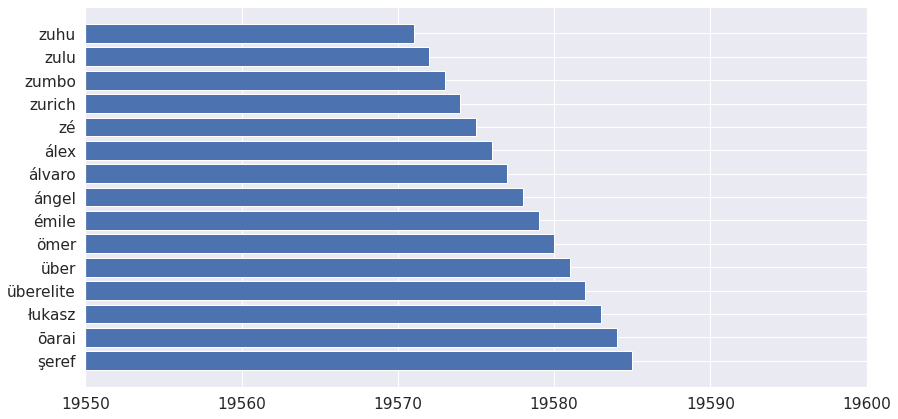

In [395]:
plt.figure( figsize = ( 14,7 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

## **SnowballStemmer('english')**

In [396]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [397]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [398]:
#Stemming for description
netflix['description'] = netflix['description'].apply( Apply_stemming )
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,1,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,11,16,Teens,1,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020,1,1,Teens,1,1


In [399]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [400]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [401]:
# Creating new dataframe vocab_after_stemming
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [402]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [403]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [404]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224, 14223, 14222, 14221, 14220, 14219])

<BarContainer object of 15 artists>

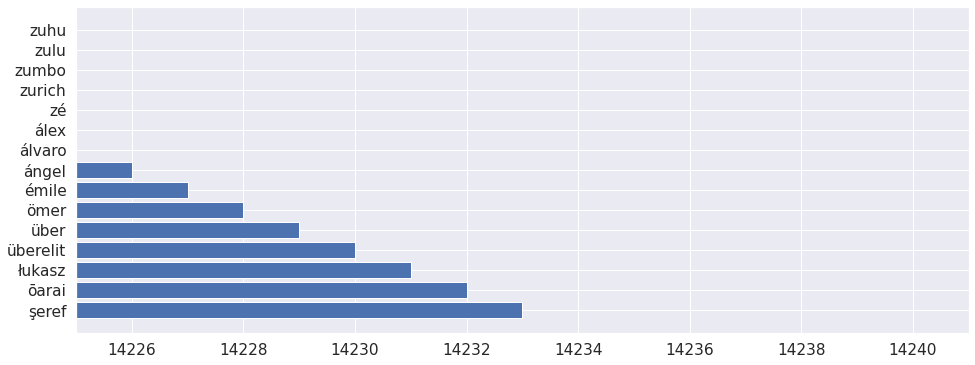

In [405]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [406]:
#Adding a new column length which contains length of description
netflix['Length(description)'] = netflix['description'].apply(lambda x: len(x))

In [407]:
netflix.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,1,2,102


In [408]:
netflix.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [409]:
len(netflix.description.iloc[0])

82

In [410]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count',
       'no_of_category', 'Length(description)'],
      dtype='object')

In [411]:
# listed_in remove punctuation
netflix['listed_in'] = netflix['listed_in'].apply(remove_punctuation)
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,1,2,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,2017,11,16,Teens,1,3,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020,1,1,Teens,1,1,99


In [412]:
#Remove stopwords for listed_in
netflix['listed_in'] = netflix['listed_in'].apply( remove_stopwords )
netflix.head( 2 )

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2,88


In [413]:
#Using CountVectorizer() to count vocabulary items
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [414]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [415]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [416]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [417]:
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [418]:
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


In [419]:
#top 15 most occurred words in listed_in
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [420]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [421]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

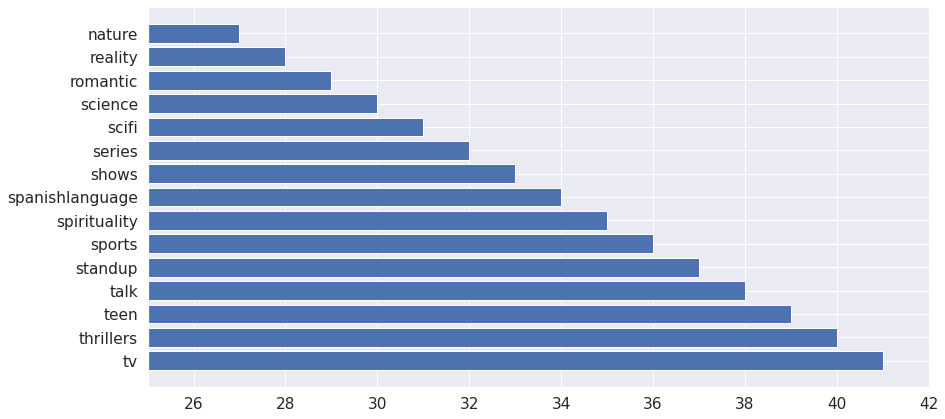

In [422]:
plt.figure( figsize = ( 14,7 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

In [423]:
#Stemming for description
netflix['listed_in'] = netflix['listed_in'].apply( Apply_stemming )
netflix.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,1,2,102


In [424]:
#TfidfVectorizer (after stemming)
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [425]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [426]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [427]:
#Creating a new DataFrame vocab_after_stemming_listed_in
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [428]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [429]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [430]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

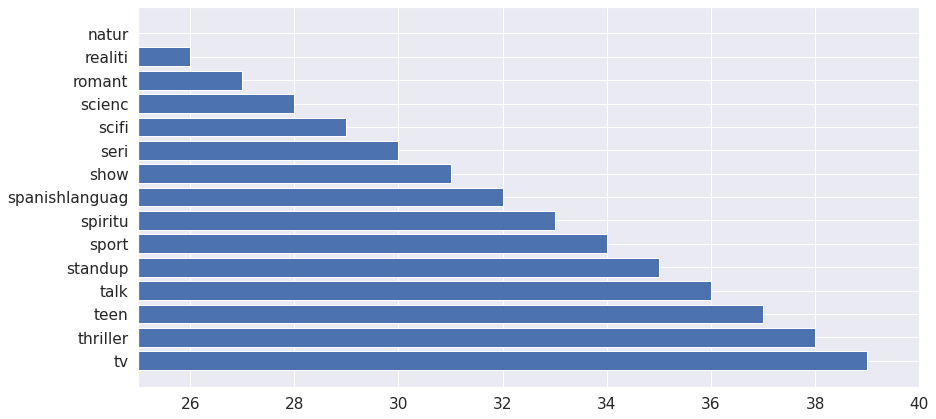

In [431]:
#Plot of the top vocab present in listed_in (after stemming)
plt.figure( figsize = ( 14,7 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

In [432]:
#Adding a new column length( listed-in ) which will contain length of listed_in
netflix['Length(listed-in)'] = netflix['listed_in'].apply(lambda x: len(x))
netflix.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category,Length(description),Length(listed-in)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,1,3,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,1,2,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,1,2,102,23


In [433]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count',
       'no_of_category', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [434]:
netflix[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


## **Applying Different Clustering Algorithms**
<u>Clustering</u>: -
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.
We have used 4 Clustering algorithms
1. K Means
3. DBSCAN
4. Hierarchical Clusering
5. Agglomerative Clustering

### **K-means**

In [435]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count',
       'no_of_category', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [436]:
X_features_rec = netflix[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [437]:
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [438]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [439]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42843328899854627
For n_clusters = 3, silhouette score is 0.3832991558393045
For n_clusters = 4, silhouette score is 0.37431547662296216
For n_clusters = 5, silhouette score is 0.3720843918336816
For n_clusters = 6, silhouette score is 0.36715062841131546
For n_clusters = 7, silhouette score is 0.3760530420435046
For n_clusters = 8, silhouette score is 0.37065497304652106
For n_clusters = 9, silhouette score is 0.37378435200824456
For n_clusters = 10, silhouette score is 0.36554434642501216
For n_clusters = 11, silhouette score is 0.3550094124669228
For n_clusters = 12, silhouette score is 0.3552411541030137
For n_clusters = 13, silhouette score is 0.348228131066896
For n_clusters = 14, silhouette score is 0.33774306480069105
For n_clusters = 15, silhouette score is 0.3425029693375103


In [440]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
2,4,0.374
7,9,0.374
3,5,0.372
6,8,0.371
4,6,0.367
8,10,0.366
9,11,0.355


**NOTE** :-
The value of the silhouette coefﬁcient is between [-1, 1]. **A score of 1 denotes the best meaning that the data point i is very compact within the cluster** to which it belongs and far away from the other clusters. **The worst value is -1.** Values near 0 denote overlapping clusters.

For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37355481904677795
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.3479317051389534
For n_clusters = 15 The average silhouette_score is : 0.

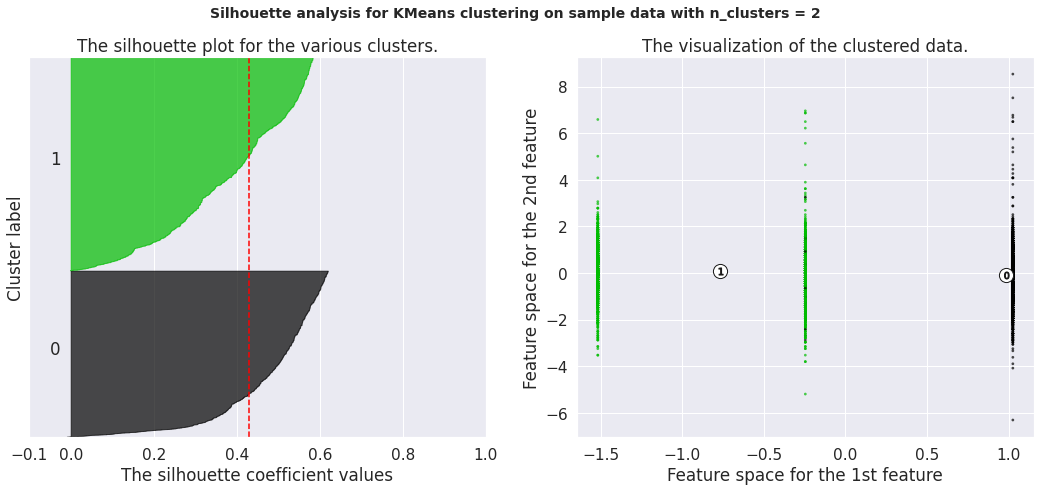

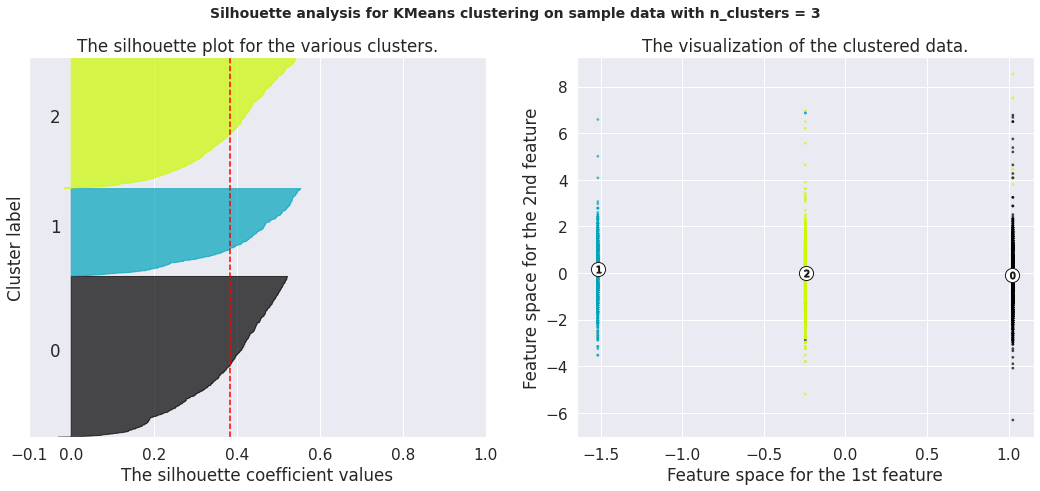

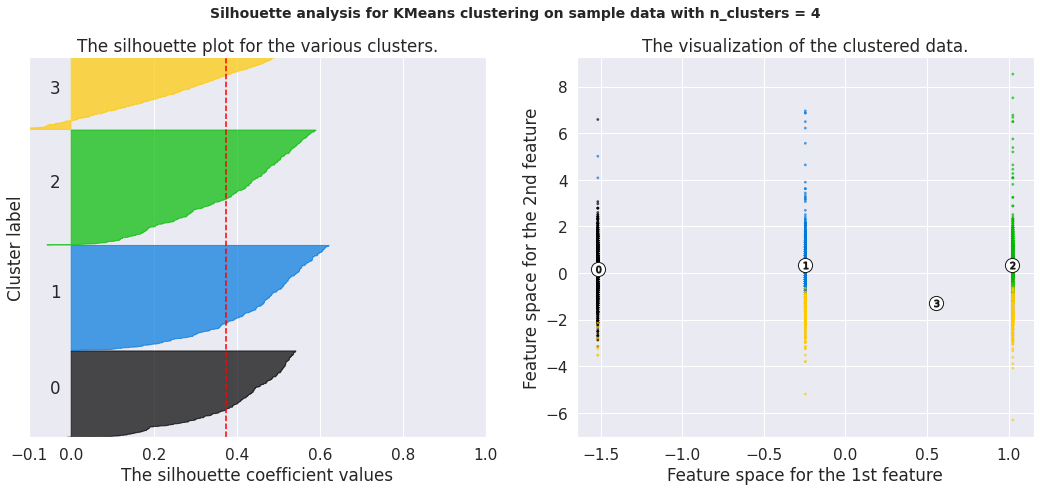

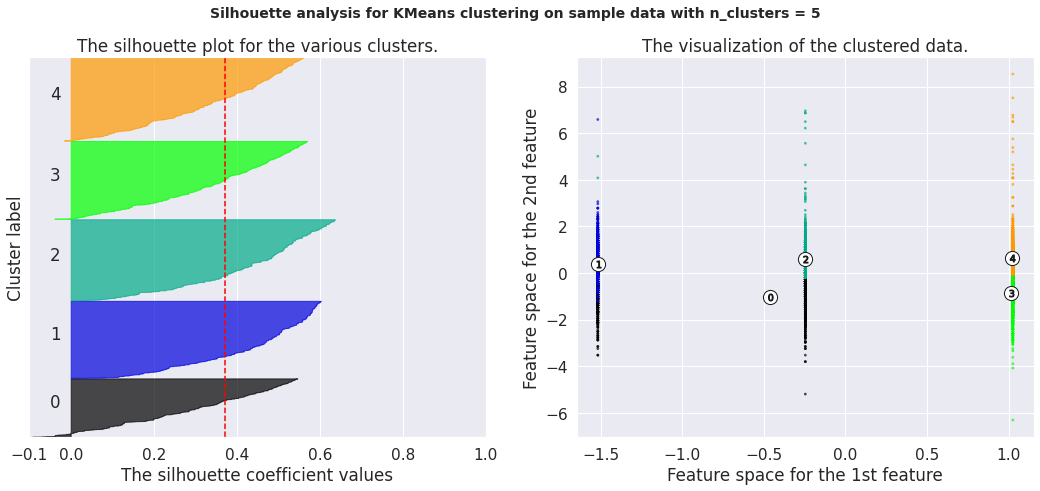

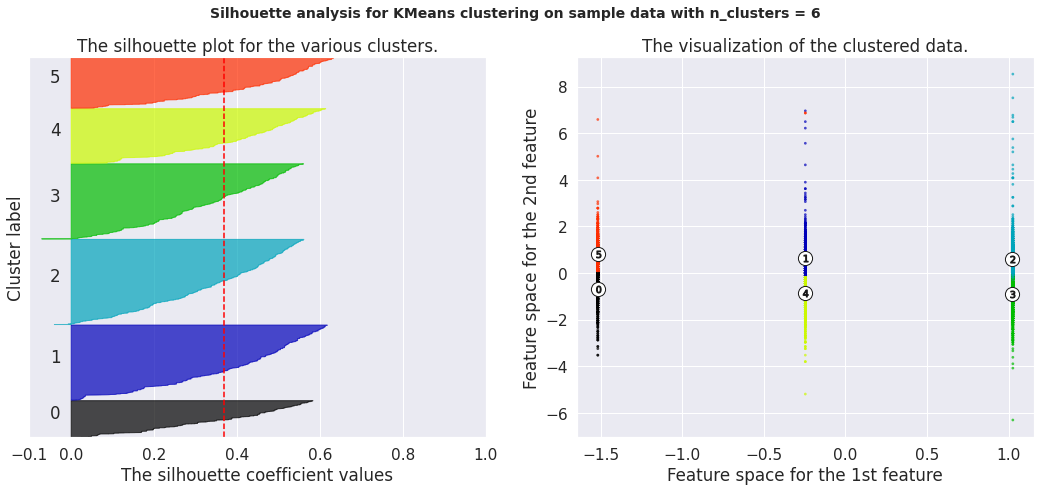

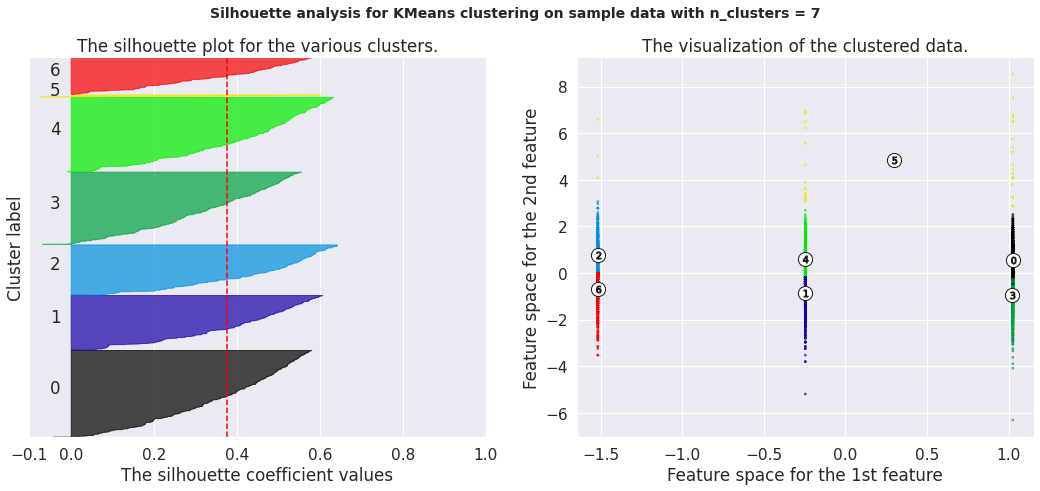

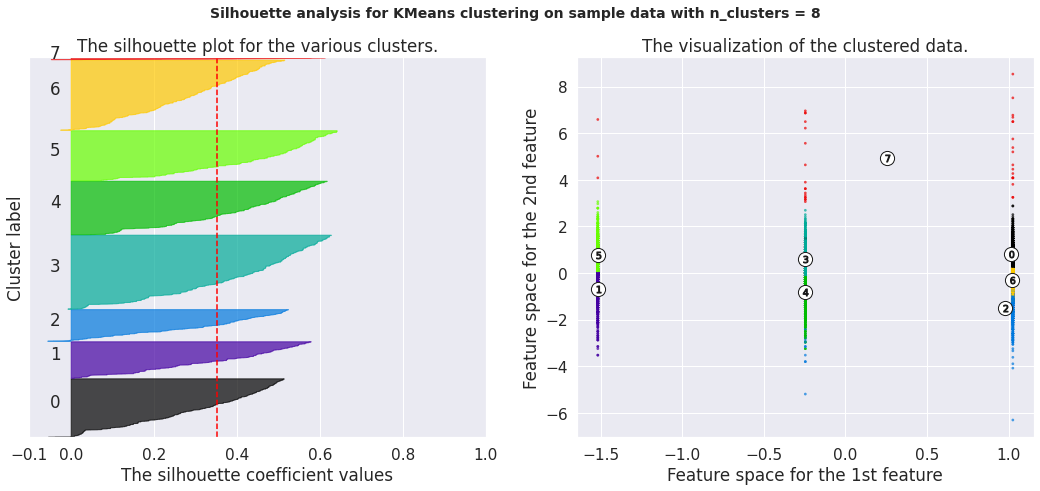

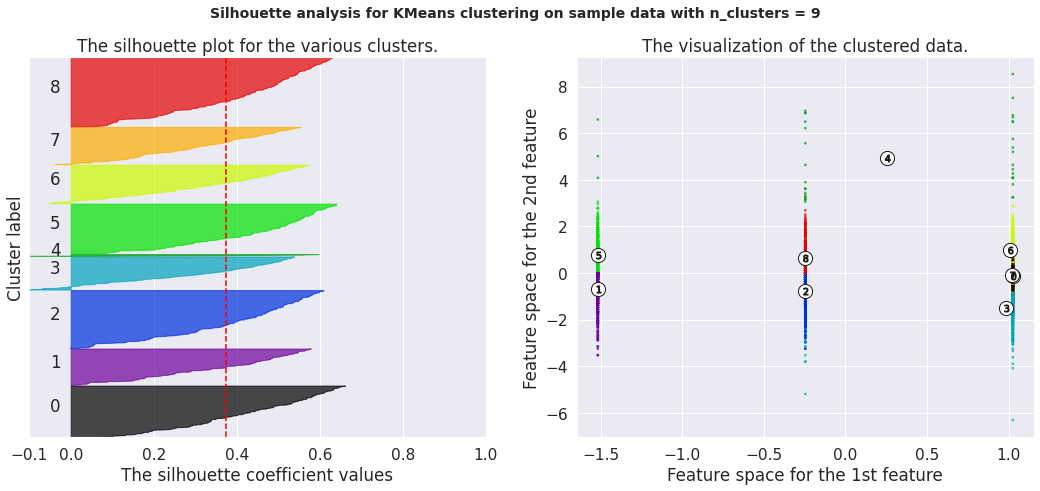

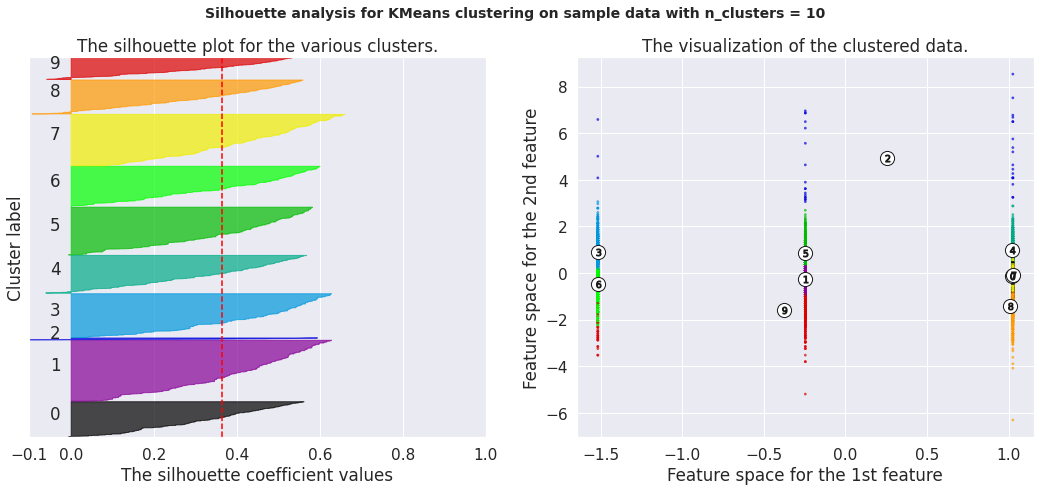

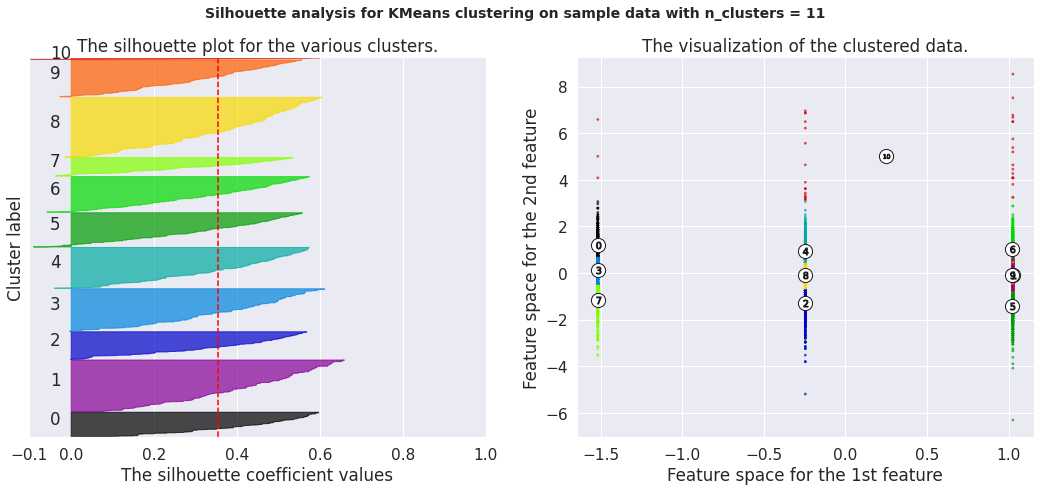

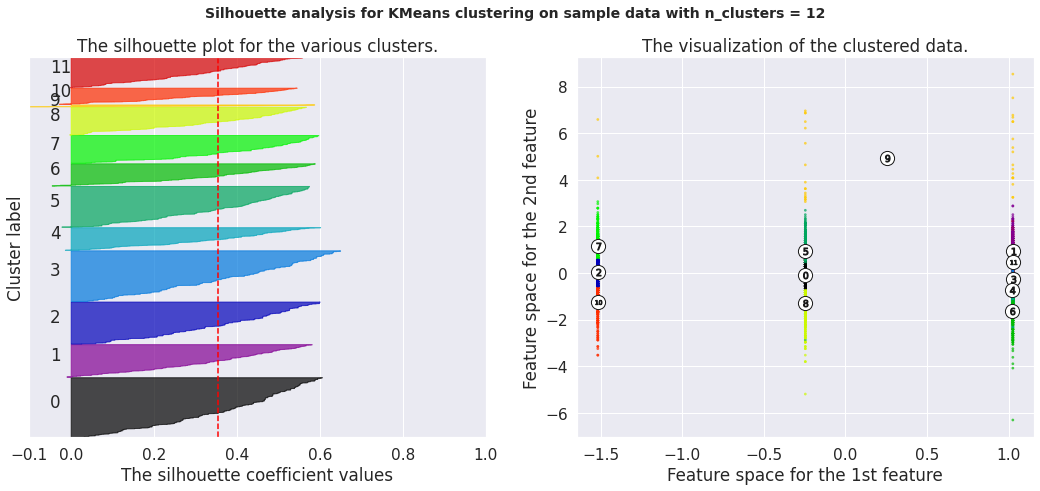

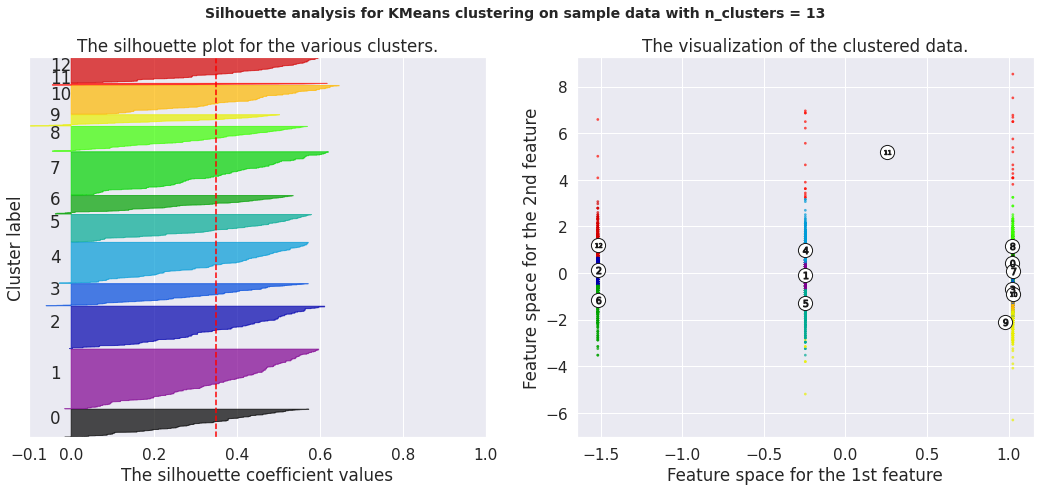

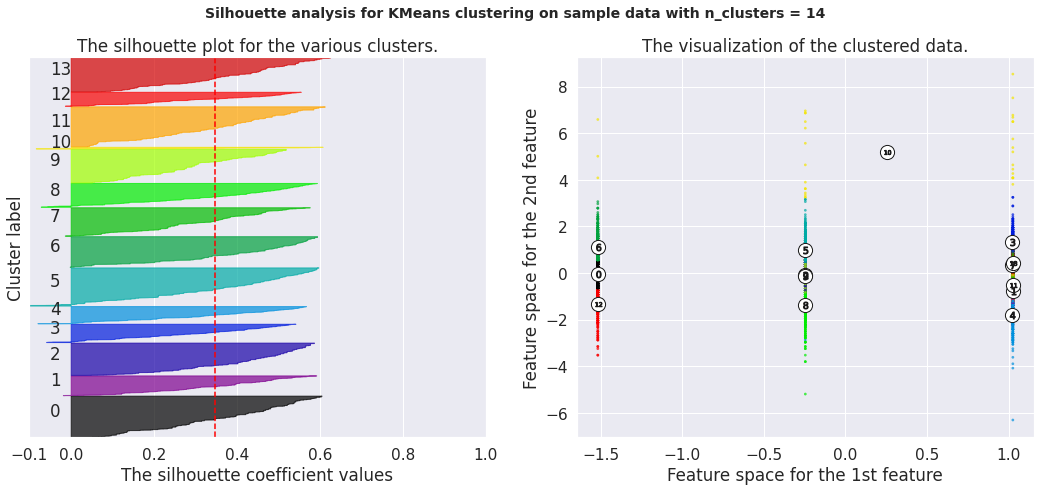

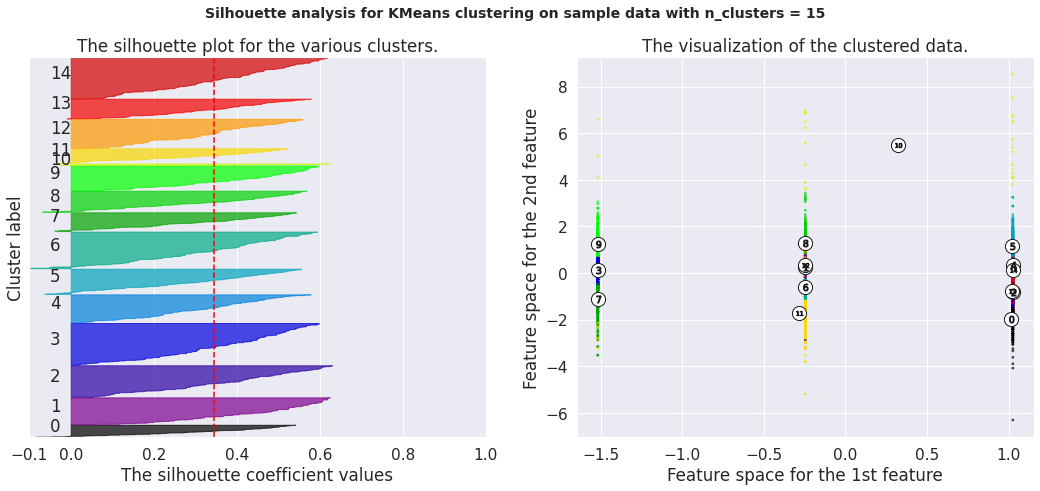

In [443]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
      # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / tick
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     
      # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

<li>Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.</li>
<li>Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.</li>


**Elbow Method**

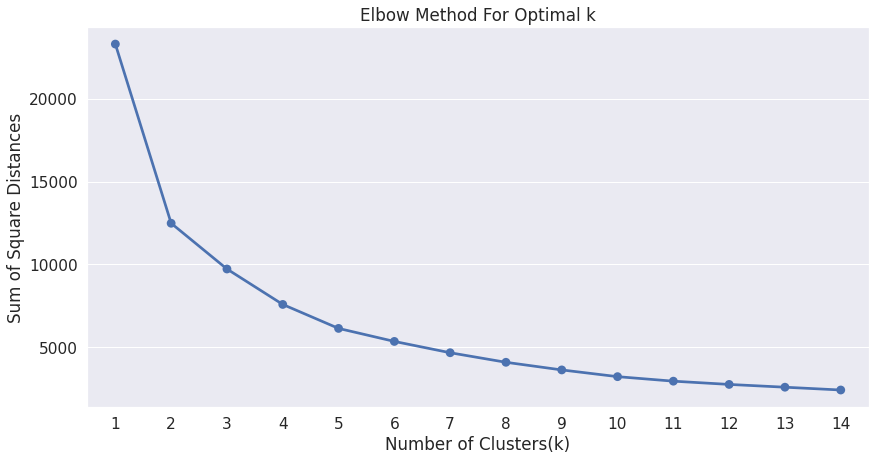

In [444]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(14 , 7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We will be using 3 clusters

In [445]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

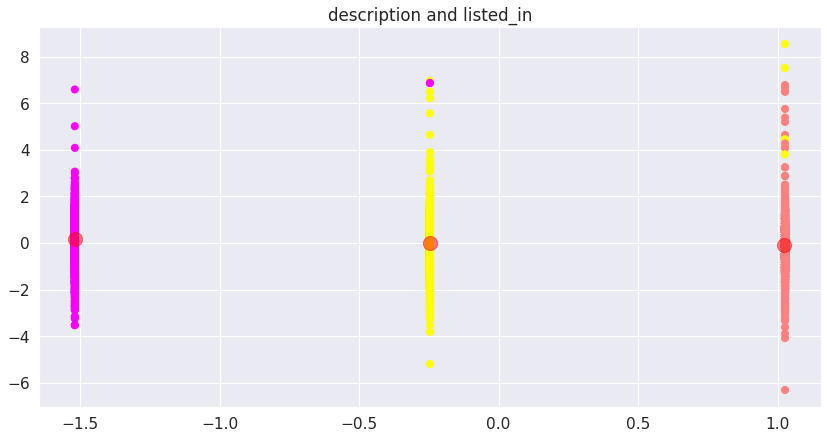

In [446]:
plt.figure(figsize=(14 , 7))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **DBSCAN**

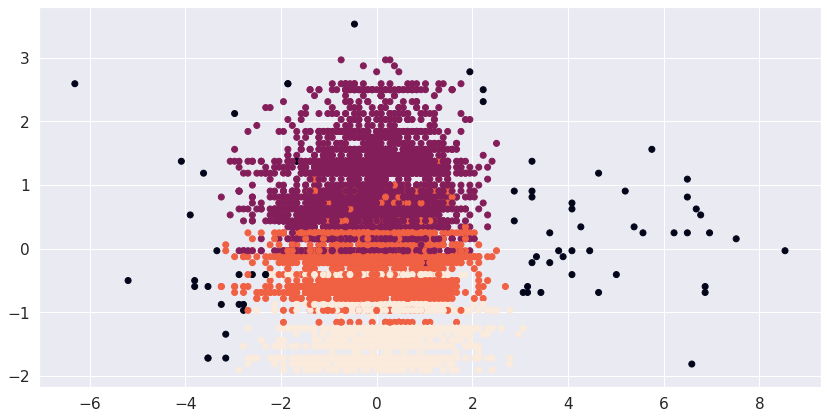

In [447]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 14 , 7 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

The black dots are noise